## Peak vs. integrated fluxes

Investigating flux scale issues, differences between peak vs. integrated flux are apparent. This notebook will explore making various plots to try and understand what is happening.

Will focus on plotting results from mosaics. Even if absolute fluxes have small offsets due to PB correction, the integrated vs. peak flux behavior should remain the same.

In [1]:
#load necessary packages
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os
import astropy.units as u
from astropy.io.fits import getheader
from flux_functions import *

In [2]:
data = get_pybdsf_comp('191209026')
print(data)

# Source_id Isl_id         RA        ...  Resid_Isl_mean  S_Code
----------- ------ ----------------- ... ---------------- ------
          0      0 24.77321297270104 ... 0.00018161012849      C
          1      0 24.76376634681744 ... 0.00018161012849      C
          2      1  24.7808563820135 ... 0.00061928638024      S
          3      2 24.74954161785573 ... 0.00084877246991      C
          4      2 24.74540238088035 ... 0.00084877246991      C
          5      2 24.78095105252323 ... 0.00084877246991      C
          6      2 24.75748331693411 ... 0.00084877246991      C
          7      2 24.74647811648993 ... 0.00084877246991      C
          8      3  24.7261049325804 ...   -8.2006145e-06      C
          9      3 24.73955589752232 ...   -8.2006145e-06      C
        ...    ...               ... ...              ...    ...
       2512   1827 19.98810049873508 ... -1.024946323e-05      S
       2513   1828 19.96469220394888 ... 0.00027377324295      M
       2514   1829 19.971

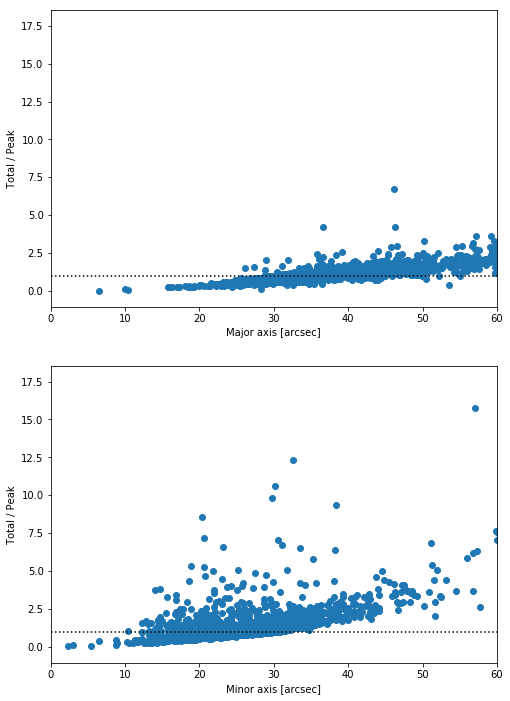

In [3]:
fig = plot_int_peak_size('191209026')

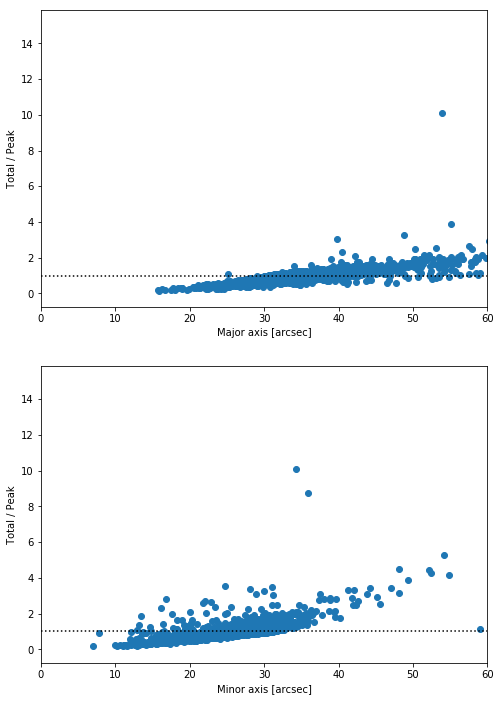

In [4]:
fig = plot_int_peak_size('191004042')

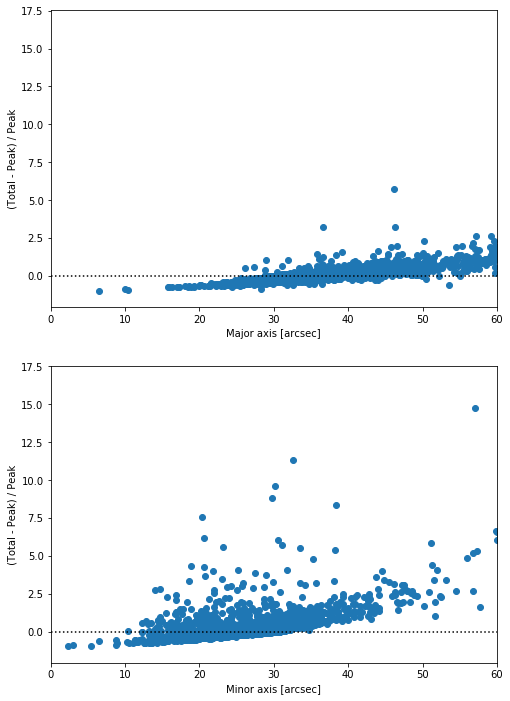

In [5]:
fig = plot_int_peak_norm_size('191209026')

See a big difference between major and minor axis, but think things should have been convolved to a circular beam as part of the mosaic. Get beam information from header.

In [6]:
def get_beam_info(taskid):
    """
    Helper function to get beam sizes from header
    """
    mosaic_path = '/tank/apertif/mosaics/'
    internal_mosaic_path = 'mosaics/continuum/mosaic/'
    filename = '{0}_mosaic.fits'.format(taskid)
    path_to_mosaic = os.path.join(mosaic_path,taskid,internal_mosaic_path,filename)
    hdr = getheader(path_to_mosaic)
    bmaj = hdr['BMAJ']*u.deg
    bmin = hdr['BMIN']*u.deg
    return bmaj.to(u.arcsec),bmin.to(u.arcsec)

In [7]:
bmaj, bmin = get_beam_info('191209026')
print(bmaj, bmin)

30.2375681698 arcsec 30.2375648171 arcsec


In [ ]:
plot_maj_min('191209026')